# [Введение в seaborn](https://telegra.ph/Vvedenie-v-seaborn-02-01-2)

In [1]:
!pip install seaborn

In [18]:
import seaborn as sns

In [13]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Статистическая визуализация
seaborn.relplot() — метод, который позволяет строить графики для визуализации отношений между двумя переменными. Параметр kind, отвечающий за вид графика, по умолчанию имеет значение «scatter». Если его не изменить, то на выходе получится обычный scatterplot, или диаграмма рассеяния.

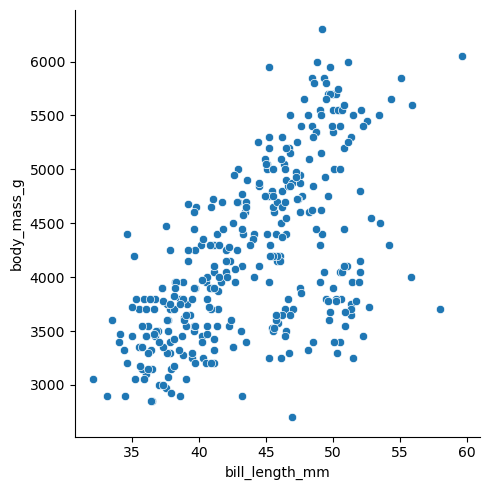

In [7]:
sns.relplot(data=penguins, x="bill_length_mm", y="body_mass_g")

In [16]:
sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g", kind="line", hue='sex')

## Визуализация распределений

sns.displot() — вид графиков, отражающих распределение переменной.

По умолчанию параметр kind имеет значение «hist», поэтому получаем диаграмму распределения возраста пассажиров Титаника с разбиением на классы кают:

In [19]:
sns.displot(titanic, x="age", hue="class")